In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

([], <a list of 0 Text yticklabel objects>)

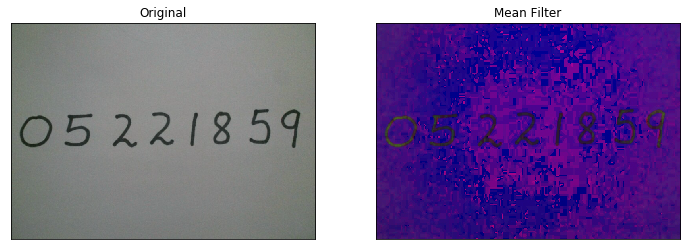

In [2]:
%matplotlib inline

"""reading the image and converting from RGB to HSV(here dimensions are )
independent of each other"""

image = cv2.imread("E:/new_images/IMAG2.jpg")
image1 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV) #Converting to HSV
figure_size = 9

#Plotting the images

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

#Deleting the axis of the images for better interface

plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(image1)
plt.title("Mean Filter")

#Deleting the axis of the images for better interface

plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

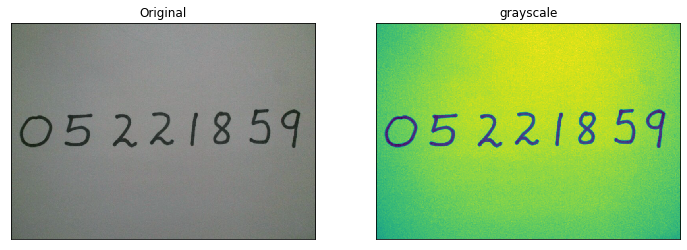

In [3]:
image2 = cv2.cvtColor(image1,cv2.COLOR_HSV2BGR)

#converting the images into grayscale

image3 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

#plotting the images

plt.figure(figsize=(12,12))
plt.subplot(121)                           #subplot 1
plt.imshow(image2)
plt.title("Original")

#Deleting the axis of the images for better interface

plt.xticks([])
plt.yticks([])

plt.subplot(122)                          #subplot2
plt.imshow(image3)
plt.title("grayscale")

#Deleting the axis of the images for better interface

plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

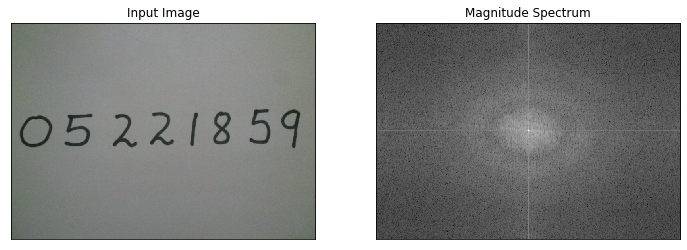

In [4]:
dft = cv2.dft(np.float32(image3),flags=cv2.DFT_COMPLEX_OUTPUT)

#shifting the zero-frequency component to the center of the spectrum

dft_shift = np.fft.fftshift(dft)

#saving the image into the fourier domain


magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

#Plotting the images

plt.figure(figsize=(12,12))
plt.subplot(121)                               #subplot 1
plt.imshow(image2,cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)                               #subplot 2
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])

In [5]:
#showing the image shape here
image2.shape

(546, 768, 3)

In [6]:
#creating a mask filter center square is 1, remaining all zeros

mask = np.zeros((image2.shape[0],image2.shape[1],2),np.uint8)
mask[(image2.shape[0]//2)-30:(image2.shape[0]//2)+30, (image2.shape[1]//2)-30:(image2.shape[1]//2)+30] = 1

([], <a list of 0 Text yticklabel objects>)

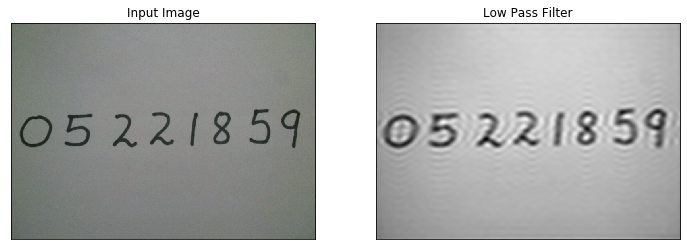

In [7]:
#appling mask and inverse DFT

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)   #Inverse DFT (IDFT) using numpy function
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

#plotting both signals

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image2,cmap='gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap="gray")
plt.title('Low Pass Filter')
plt.xticks([])
plt.yticks([])